# House Pricing Predictor

In [2]:
import numpy as np
import pandas as pd
import folium as fl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import dateparser

In [3]:
df = pd.read_csv("kc_house_data.csv", parse_dates=["date"] )

In [4]:
pd.set_option("display.max_columns",None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Goals & Objective 

### Realtor need a precise house pricing to predict a pricing of the house that they wanna sell, based on all house pricing in the area of data used in for this machine learning. here is the list of this project goals and objective:

1. Predict house pricing with high accuracy 
2. Give a reasonable pricing to customer
3. Gain trushtworhty 
4. corelation between each variable in the data 
5. house sales report per year 
6. analyse house pricing based on year it's build and renovated

## EDA of House Pricing

## Understanding The DATA

### this part to understand and clean the data to be ready to be analysed 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

notes: NO NAN Value in all columns

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Notes: There a zero bedroom in bedroom and bathrooms

There's no OBJECT in the data so no need to describe object

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
df["view"].unique()

array([0, 3, 4, 2, 1])

In [10]:
df["condition"].unique()

array([3, 5, 4, 1, 2])

Columns analysis

- waterfront : yes or no
- view : categorical but not ranking
- condition : rating
- square feet basement : categorical : none : 0 , low : 1, medium: 2, high : 3

In [11]:
df = df.drop(columns=["id"])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Id columns is dropped because it wont be used in the analysis

### Extracting the data 

In [12]:
date_dt = df["date"].dt

In [13]:
df["month"] = date_dt.month_name()

In [14]:
df["year"] = date_dt.year

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,October,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,February,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,December,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,February,2015


In [16]:
df["year"].unique()

array([2014, 2015])

Data is from 2014 and 2015 

In [17]:
df["month"].unique()

array(['October', 'December', 'February', 'May', 'June', 'January',
       'April', 'March', 'July', 'August', 'November', 'September'],
      dtype=object)

In [18]:
df["day_date"] = date_dt.day

In [19]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,October,2014,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,2014,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,February,2015,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,December,2014,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,February,2015,18


## handling the error data

In [20]:
df[df["bedrooms"] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date
875,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,June,2014,12
3119,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,February,2015,5
3467,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,August,2014,5
4868,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,October,2014,2
6994,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,June,2014,24
8477,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,November,2014,17
8484,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,September,2014,25
9773,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,April,2015,29
9854,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,December,2014,23
12653,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,February,2015,18


In [21]:
df["bedrooms"].mean()

3.37084162309721

In [22]:
def bed_handling(bedroom) :
    if bedroom == 0 :
        return df["bedrooms"].mean()
    else:
        return bedroom


In [23]:
def bath_handling(bathroom) :
    if bathroom == 0 :
        return df["bathrooms"].mean()
    else:
        return bathroom

In [24]:
df["bedrooms"] = df["bedrooms"].apply(bed_handling)

In [25]:
df["bathrooms"] = df["bathrooms"].apply(bath_handling)

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,October,2014,13
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,2014,9
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,February,2015,25
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,December,2014,9
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,February,2015,18


In [27]:
df[df["bedrooms"] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date


Error data has been handled all the 0 bedrooms or bathrooms, it filled with the mean of the data

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,October,2014,13
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,2014,9
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,February,2015,25
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,December,2014,9
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,February,2015,18


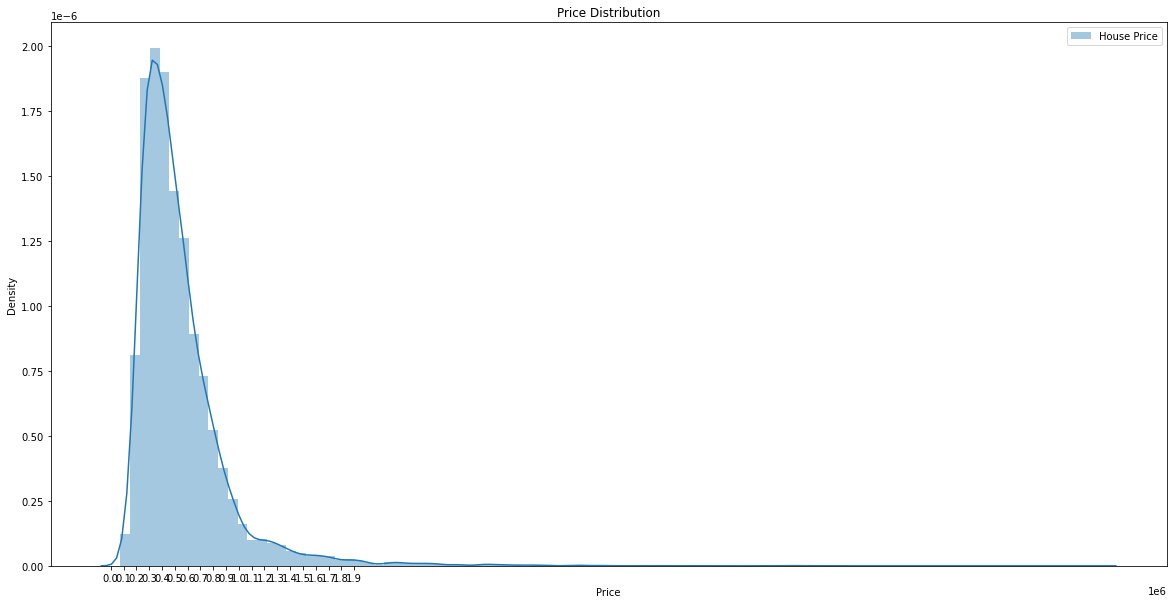

In [29]:
plt.figure(figsize= (20,10))
plt.xticks(np.arange(0,2000000,step = 100000))
sns.distplot(df["price"], bins=100, label = 'House Price')
plt.title('Price Distribution')
plt.legend()
plt.xlabel('Price')
plt.show()

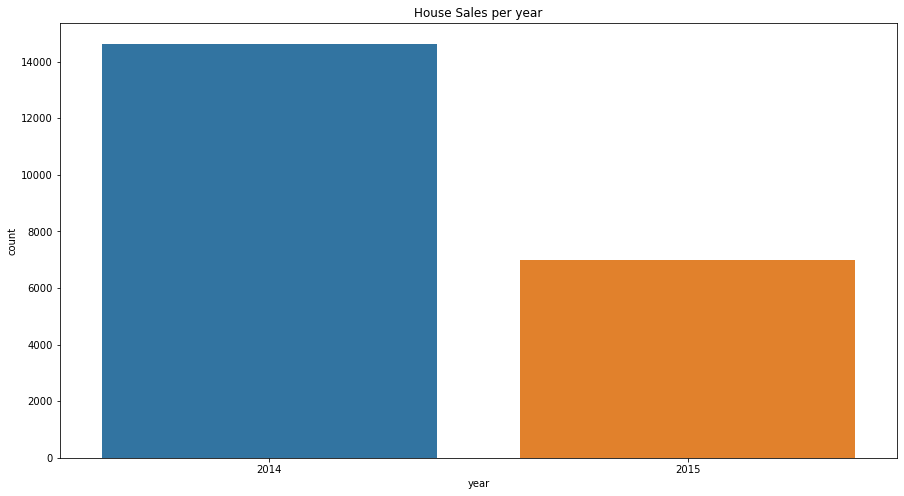

In [30]:
plt.figure(figsize=(15, 8))
sns.countplot(x= df["year"] , data=df)
plt.title('House Sales per year')
plt.show()

Sales in 2014 is much higher because the data in 2014 have more months in 2014

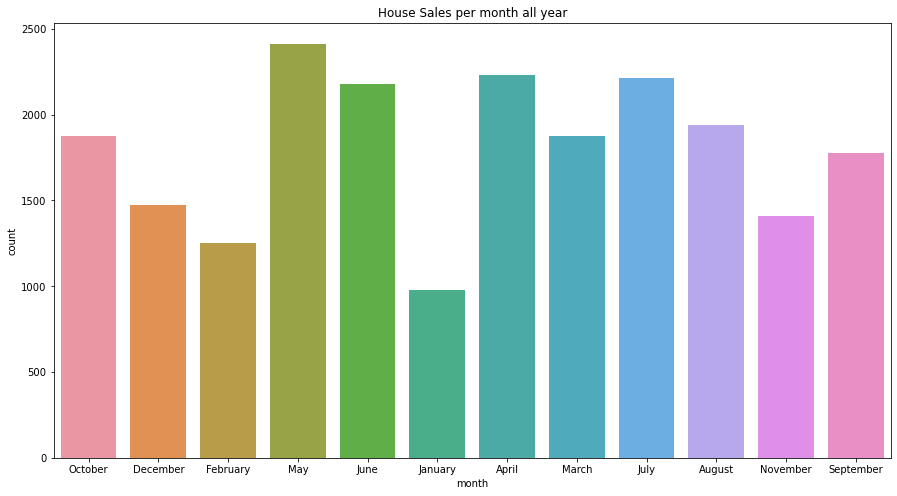

In [31]:
plt.figure(figsize=(15, 8))
sns.countplot(x= df["month"] , data=df)
plt.title('House Sales per month all year')
plt.show()

as we can see from the house sales by months from these data, sales in starting from april to july is the peak of house selling

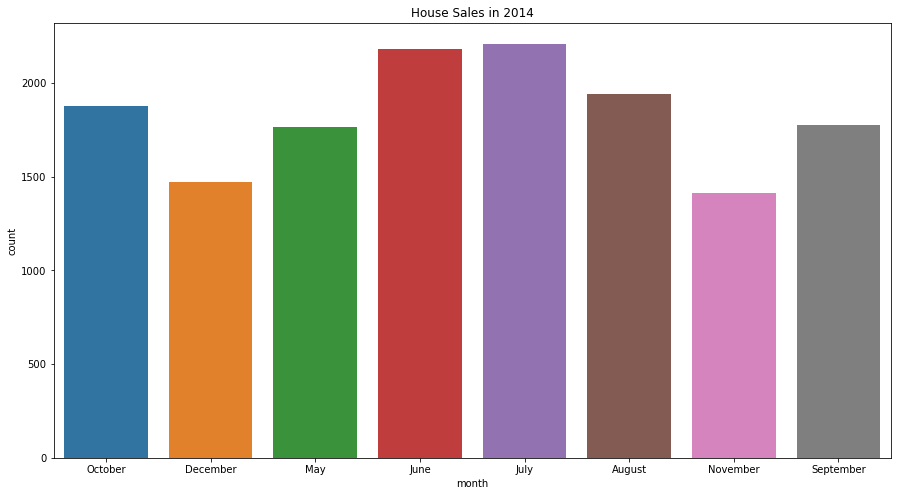

In [32]:
plt.figure(figsize=(15, 8))
sns.countplot(x= df[df["year"] == 2014]["month"] , data=df)
plt.title('House Sales in 2014')
plt.show()

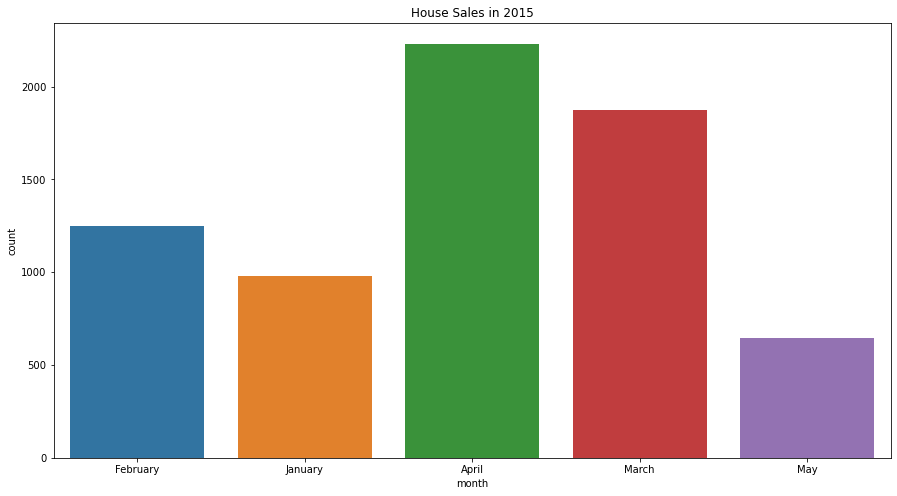

In [33]:
plt.figure(figsize=(15, 8))
sns.countplot(x= df[df["year"] == 2015]["month"] , data=df)
plt.title('House Sales in 2015')
plt.show()

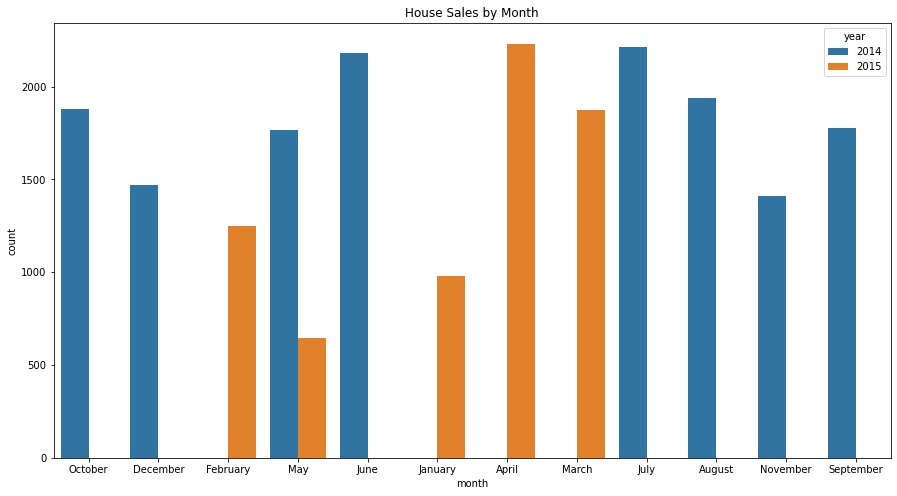

In [34]:
plt.figure(figsize=(15, 8))
sns.countplot(x= df["month"] , hue="year", data=df)
plt.title('House Sales by Month')
plt.show()

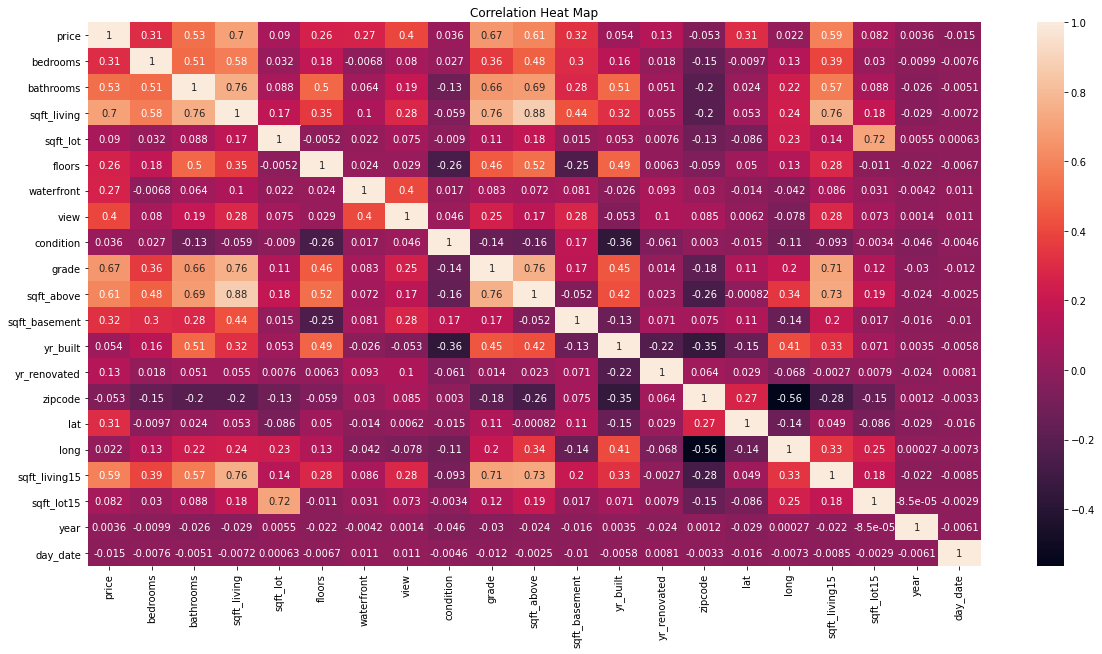

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heat Map")
plt.show()

## Handling Data for Machine Learning

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,October,2014,13
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,2014,9
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,February,2015,25
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,December,2014,9
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,February,2015,18


In [37]:
df["sqft_basement"].describe()

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [38]:
bin_basement = [-1,0,1000,2000,3000,4000,5000]

In [39]:
label = ["none", "x-small", "small", "medium", "large", "x-large"]

In [40]:
df["basement_cat"] = pd.cut(df["sqft_basement"], bins = bin_basement, labels=label)

In [41]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date,basement_cat
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,October,2014,13,none
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,2014,9,x-small
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,February,2015,25,none
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,December,2014,9,x-small
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,February,2015,18,none


In [42]:
def basement_rank(basement):
    if basement == "none":
        return 0 
    elif basement == "x-small":
        return 1 
    elif basement == "small":
        return 2
    elif basement == "medium":
        return 3
    elif basement == "large":
        return 4
    elif basement == "x-large":
        return 5


In [43]:
df["basement_cat"] = df["basement_cat"].apply(basement_rank)

In [44]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day_date,basement_cat
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,October,2014,13,0
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,2014,9,1
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,February,2015,25,0
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,December,2014,9,1
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,February,2015,18,0


In [45]:
df_ml = df.drop(columns= ["date", "month", "year", "day_date"])

In [46]:
df_ml.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_cat
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [47]:
df_ml["waterfront"].unique()

array([0, 1])

In [48]:
df_ml["view"].unique()

array([0, 3, 4, 2, 1])

In [49]:
df_ml["condition"].unique()

array([3, 5, 4, 1, 2])

In [50]:
df_ml['yr_house'] = np.where(df_ml['yr_renovated'] == 0, df_ml['yr_built'], df_ml['yr_renovated'])


In [51]:
df_ml.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_cat,yr_house
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,1955
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1991
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1933
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1,1965
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,1987


In [52]:
df_ml.drop(columns=["lat","long","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode"],inplace=True)

In [53]:
df_ml.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15,basement_cat,yr_house
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1340,5650,0,1955
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,1690,7639,1,1991
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,2720,8062,0,1933
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1360,5000,1,1965
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1800,7503,0,1987


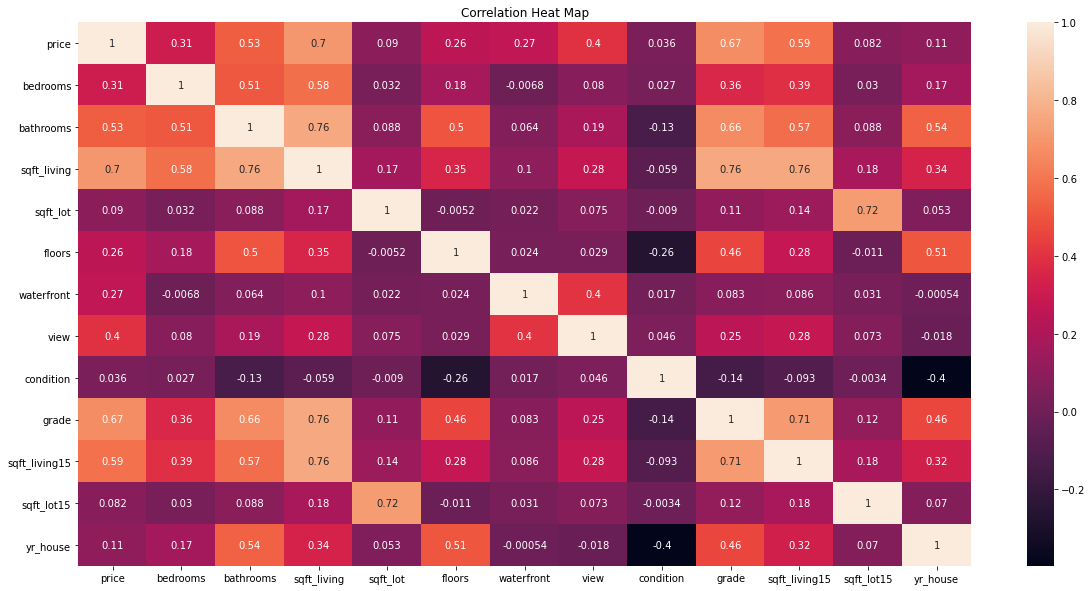

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df_ml.corr(), annot=True)
plt.title("Correlation Heat Map")
plt.show()

## BASE MODEL

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [59]:
x = df_ml.drop(columns="price")
y = df_ml["price"]

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80,random_state=0)

In [61]:
model_base = LinearRegression()

In [62]:
model_base.fit(x_train,y_train)

LinearRegression()

In [63]:
def reg_evaluation(data_sample_train,data_sample_test, aktual_train,aktual_test, model):
    hasil_model_train = model.predict(data_sample_train)
    r2_train = r2_score(aktual_train, hasil_model_train)
    mae_train = mean_absolute_error(aktual_train, hasil_model_train)
    mse_train = mean_squared_error(aktual_train, hasil_model_train)
    rmse_train = np.sqrt(mse_train)

    hasil_model_test = model.predict(data_sample_test)
    r2_test = r2_score(aktual_test, hasil_model_test)
    mae_test = mean_absolute_error(aktual_test, hasil_model_test)
    mse_test = mean_squared_error(aktual_test, hasil_model_test)
    rmse_test = np.sqrt(mse_test)


    hasil_evaluation = pd.DataFrame(data= {"Training" : [r2_train, mae_train, mse_train,rmse_train],"Testing" : [r2_test, mae_test, mse_test,rmse_test]}, index=["R2", "MAE" , "MSE", "RMSE"] )

    return hasil_model_train, hasil_model_test, hasil_evaluation 

In [64]:
base_train_hasil, base_test_hasil, base_evaluation  = reg_evaluation(x_train,x_test,y_train,y_test,model_base)

In [65]:
base_evaluation

,Training,Testing
R2,6.407123e-01,6.306441e-01
MAE,1.439084e+05,1.389519e+05
MSE,4.983421e+10,4.392538e+10
RMSE,2.232358e+05,2.095838e+05


## Optimization 1 (POLY AND POWERTRANSFORMER)

In [66]:
df_ml.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15,basement_cat,yr_house
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1340,5650,0,1955
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,1690,7639,1,1991
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,2720,8062,0,1933
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1360,5000,1,1965
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1800,7503,0,1987


In [108]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [109]:
yeo_pow = PowerTransformer(method="yeo-johnson")

In [110]:
num_col = df_ml[["bedrooms", "bathrooms", "sqft_living","sqft_lot", "floors", "yr_house"]]

In [111]:
num_poly = poly.fit_transform(num_col)

In [112]:
num_pow = yeo_pow.fit_transform(num_poly)

In [113]:
df_pow = pd.DataFrame(num_pow)
df_pow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460
0,-0.350760,-1.583847,-1.121655,-0.331682,-0.975610,-0.750006,-0.353426,-1.268017,-0.883444,-0.394000,-0.864396,-0.382689,-1.575001,-1.461907,-1.075283,-1.495254,-1.580985,-1.0,-1.0,-1.260534,-1.127887,-1.0,-0.812564,-1.0,-0.973202,-0.990262,-0.750006,-0.352041,-1.034377,-0.750244,-0.427123,-0.738059,-0.366562,-1.431464,-1.251091,-0.972908,-1.322243,-1.255973,-0.984584,-1.0,-1.067736,-0.890779,-1.0,-0.754764,-1.0,-0.940541,-0.860838,-0.413579,-1.570935,-1.530207,-1.471471,-1.539248,-1.586606,-1.0,-1.0,-1.479989,-1.0,-1.0,-1.476946,-1.0,-1.377251,-1.530080,-1.569501,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.229500,-1.0,-1.0,-1.0,-1.0,-1.0,-1.170643,-1.0,-1.0,-0.972290,-0.985479,-1.0,-1.0,-0.350322,-0.882729,-0.667766,-0.445635,-0.649293,-0.361088,-1.274733,-1.093465,-0.885265,-1.155691,-1.022343,-0.883418,-1.0,-0.931288,-0.757001,-1.0,-0.698439,-1.0,-0.867510,-0.736086,-1.0,-1.488748,-1.387289,-1.303303,-1.446370,-1.417507,-1.0,-1.0,-1.315871,-1.251621,-1.0,-1.245222,-1.0,-1.291238,-1.311015,-1.256001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.108037,-1.069799,-1.0,-1.0,-1.0,-1.0,-1.021715,-1.0,-1.0,-0.963621,-0.930186,-0.866615,-1.0,-1.570827,-1.554129,-1.597641,-1.552047,-1.588462,-1.0,-1.0,-1.538151,-1.0,-1.0,-1.657794,-1.0,-1.479275,-1.573939,-1.580992,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.439495,-1.0,-1.0,-1.0,-1.0,-1.0,-1.603080,-1.0,-1.0,-1.287314,-1.442679,-1.523531,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.193284,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.255415,-1.0,-1.0,-1.0,-0.972248,-0.983771,-1.0,-1.0,-1.0,-0.349278,-0.781838,-0.612393,-0.454444,-0.589665,-0.358333,-1.137824,-0.978355,-0.821107,-1.020860,-0.875928,-0.808101,-1.0,-0.834837,-1.0,-1.0,-0.660706,-1.0,-0.795221,-0.649818,-1.0,-1.380557,-1.260378,-1.170163,-1.325543,-1.255777,-1.116278,-1.0,-1.180210,-1.095537,-1.0,-1.086957,-1.0,-1.179988,-1.139517,-1.0,-0.947310,-1.0,-1.005480,-1.0,-1.0,-1.0,-1.0,-1.006279,-0.934571,-1.0,-1.0,-1.0,-1.0,-0.903310,-1.0,-1.0,-0.917316,-0.857655,-1.0,-1.0,-1.517201,-1.450606,-1.452730,-1.496147,-1.476581,-1.0,-1.0,-1.418704,-1.0,-1.0,-1.455550,-1.0,-1.421362,-1.437473,-1.415310,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.316468,-1.0,-1.0,-1.0,-1.0,-1.0,-1.374826,-1.0,-1.0,-1.254477,-1.

In [114]:
df_ml2 = pd.concat([df_ml.drop(columns=["bedrooms", "bathrooms", "sqft_living","sqft_lot", "floors", "yr_house"]),df_pow],axis=1)

In [115]:
df_ml2.head()

,price,waterfront,view,condition,grade,sqft_living15,sqft_lot15,basement_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460
0,221900.0,0,0,3,7,1340,5650,0,-0.350760,-1.583847,-1.121655,-0.331682,-0.975610,-0.750006,-0.353426,-1.268017,-0.883444,-0.394000,-0.864396,-0.382689,-1.575001,-1.461907,-1.075283,-1.495254,-1.580985,-1.0,-1.0,-1.260534,-1.127887,-1.0,-0.812564,-1.0,-0.973202,-0.990262,-0.750006,-0.352041,-1.034377,-0.750244,-0.427123,-0.738059,-0.366562,-1.431464,-1.251091,-0.972908,-1.322243,-1.255973,-0.984584,-1.0,-1.067736,-0.890779,-1.0,-0.754764,-1.0,-0.940541,-0.860838,-0.413579,-1.570935,-1.530207,-1.471471,-1.539248,-1.586606,-1.0,-1.0,-1.479989,-1.0,-1.0,-1.476946,-1.0,-1.377251,-1.530080,-1.569501,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.229500,-1.0,-1.0,-1.0,-1.0,-1.0,-1.170643,-1.0,-1.0,-0.972290,-0.985479,-1.0,-1.0,-0.350322,-0.882729,-0.667766,-0.445635,-0.649293,-0.361088,-1.274733,-1.093465,-0.885265,-1.155691,-1.022343,-0.883418,-1.0,-0.931288,-0.757001,-1.0,-0.698439,-1.0,-0.867510,-0.736086,-1.0,-1.488748,-1.387289,-1.303303,-1.446370,-1.417507,-1.0,-1.0,-1.315871,-1.251621,-1.0,-1.245222,-1.0,-1.291238,-1.311015,-1.256001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.108037,-1.069799,-1.0,-1.0,-1.0,-1.0,-1.021715,-1.0,-1.0,-0.963621,-0.930186,-0.866615,-1.0,-1.570827,-1.554129,-1.597641,-1.552047,-1.588462,-1.0,-1.0,-1.538151,-1.0,-1.0,-1.657794,-1.0,-1.479275,-1.573939,-1.580992,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.439495,-1.0,-1.0,-1.0,-1.0,-1.0,-1.603080,-1.0,-1.0,-1.287314,-1.442679,-1.523531,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.193284,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.255415,-1.0,-1.0,-1.0,-0.972248,-0.983771,-1.0,-1.0,-1.0,-0.349278,-0.781838,-0.612393,-0.454444,-0.589665,-0.358333,-1.137824,-0.978355,-0.821107,-1.020860,-0.875928,-0.808101,-1.0,-0.834837,-1.0,-1.0,-0.660706,-1.0,-0.795221,-0.649818,-1.0,-1.380557,-1.260378,-1.170163,-1.325543,-1.255777,-1.116278,-1.0,-1.180210,-1.095537,-1.0,-1.086957,-1.0,-1.179988,-1.139517,-1.0,-0.947310,-1.0,-1.005480,-1.0,-1.0,-1.0,-1.0,-1.006279,-0.934571,-1.0,-1.0,-1.0,-1.0,-0.903310,-1.0,-1.0,-0.917316,-0.857655,-1.0,-1.0,-1.517201,-1.450606,-1.452730,-1.496147,-1.476581,-1.0,-1.0,-1.418704,-1.0,-1.0,-1.455550,-1.0,-1.421362,-1.437473,-1.41531

In [116]:
x_1 = df_ml2.drop(columns="price")
y_1 = df_ml2["price"]

In [117]:
x_train_pol, x_test_pol, y_train_pol, y_test_pol = train_test_split(x_1,y_1,train_size=0.80,random_state=0)

In [118]:
model_poly = LinearRegression()

In [119]:
model_poly.fit(x_train_pol,y_train_pol)

LinearRegression()

In [120]:
poly_train_hasil, poly_test_hasil, poly_evaluation  = reg_evaluation(x_train_pol,x_test_pol,y_train_pol,y_test_pol,model_poly)

POLY

In [121]:
poly_evaluation

,Training,Testing
R2,7.147178e-01,6.869670e-01
MAE,1.302596e+05,1.276232e+05
MSE,3.956944e+10,3.722722e+10
RMSE,1.989207e+05,1.929436e+05


# Optimization 2 (LASSO, RIDGE, ElASTIC)

In [148]:
model_ridge = Ridge(alpha = 0.0000000001)

In [149]:
model_ridge.fit(x_train_pol,y_train_pol)

Ridge(alpha=1e-10)

In [158]:
model_lasso = Lasso(alpha=0.00000000000001)

In [159]:
model_lasso.fit(x_train_pol,y_train_pol)

Lasso(alpha=1e-14)

In [169]:
model_elastic  = ElasticNet(alpha = 0.001,l1_ratio=0.8)

In [170]:
model_elastic.fit(x_train_pol,y_train_pol)

ElasticNet(alpha=0.001, l1_ratio=0.8)

In [171]:
ridge_train_hasil, ridge_test_hasil, ridge_evaluation  = reg_evaluation(x_train_pol,x_test_pol,y_train_pol,y_test_pol,model_ridge)

### RIDGE

best solution model is ridge by having the highest posible R2 evaluation and lowest MAE, MSE, and RMSE evalution 

In [172]:
ridge_evaluation

,Training,Testing
R2,7.128933e-01,6.913919e-01
MAE,1.305310e+05,1.273503e+05
MSE,3.982251e+10,3.670100e+10
RMSE,1.995558e+05,1.915750e+05


In [173]:
lasso_train_hasil, lasso_test_hasil, lasso_evaluation  = reg_evaluation(x_train_pol,x_test_pol,y_train_pol,y_test_pol,model_lasso)

### LASSO

In [174]:
lasso_evaluation

,Training,Testing
R2,6.683667e-01,6.591217e-01
MAE,1.381580e+05,1.333663e+05
MSE,4.599847e+10,4.053870e+10
RMSE,2.144725e+05,2.013422e+05


In [175]:
elastic_train_hasil, elastic_test_hasil, elastic_evaluation  = reg_evaluation(x_train_pol,x_test_pol,y_train_pol,y_test_pol,model_elastic)

### ELASTIC

In [176]:
elastic_evaluation

,Training,Testing
R2,6.680683e-01,6.592155e-01
MAE,1.380200e+05,1.332452e+05
MSE,4.603986e+10,4.052754e+10
RMSE,2.145690e+05,2.013145e+05


## OPTIMIZATION 3 (TUNING)

In [157]:
alpha_lasso = [0.0000001, 0.01,0.00000000000001,0.1,0.15,1,5,7,10,15,20]
eva_l = []
for i in alpha_lasso :
    model_lasso = Lasso(alpha = i)
    model_lasso.fit(x_train_pol,y_train_pol)
    pred_y_lasso = model_lasso.predict(x_test_pol)
    result = r2_score(y_test_pol,pred_y_lasso)
    eva_l.append(result)

eva_l

[0.6591217462349982,
 0.6591217337120912,
 0.6591217462351238,
 0.6591216182455435,
 0.659121553550216,
 0.6591202695417732,
 0.6591088941839554,
 0.6590997505312208,
 0.6590835361009608,
 0.6590396037583648,
 0.6589926357981596]

In [147]:
alpha_ridge = [0.0000000001, 0.00000000001,0.05,0.1,0.15,1,5,7,10,15,20]
eva_r = []
for i in alpha_ridge :
    model_ridge = Ridge(alpha = i)
    model_ridge.fit(x_train_pol,y_train_pol)
    pred_y_ridge = model_ridge.predict(x_test_pol)
    result = r2_score(y_test_pol,pred_y_ridge)
    eva_r.append(result)

eva_r

[0.6913918627485324,
 0.691380840951692,
 0.6763491510929951,
 0.6750291325363823,
 0.6743172428186832,
 0.670288815458686,
 0.6652019672533275,
 0.6639781819400669,
 0.6626042322826786,
 0.660919707352887,
 0.659618774839128]

In [168]:
alpha_elastic = [0.001, 0.0000000001,0.05,0.1,0.15,1,5,7,10,15,20]
l_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
eva_e = []

for i in alpha_elastic :
    eva_rat = []
    for j in l_ratio:
        model_elastic = ElasticNet(alpha = i,l1_ratio=j)
        model_elastic.fit(x_train_pol,y_train_pol)
        pred_y_elastic = model_elastic.predict(x_test_pol)
        result1 = r2_score(y_test_pol,pred_y_elastic)
        eva_rat.append(result1)
    eva_e.append(eva_rat)

eva_e

pd.DataFrame(eva_e)

,0,1,2,3,4,5,6,7,8
0,0.658557,0.658706,0.658843,0.658964,0.659066,0.659145,0.659197,0.659216,0.659193
1,0.659122,0.659122,0.659122,0.659122,0.659122,0.659122,0.659122,0.659122,0.659122
2,0.625727,0.627132,0.628734,0.630577,0.632714,0.635268,0.638683,0.643347,0.650355
3,0.616401,0.618121,0.620030,0.622148,0.624478,0.627132,0.630576,0.635267,0.643346
4,0.609528,0.611669,0.614060,0.616400,0.619054,0.622147,0.625726,0.630575,0.638681
5,0.550342,0.555730,0.561506,0.567880,0.574954,0.582685,0.591424,0.601712,0.614827
6,0.465699,0.471759,0.478802,0.487104,0.497068,0.509298,0.524783,0.545296,0.574936
7,0.449399,0.454913,0.461417,0.469224,0.478796,0.490857,0.506624,0.528389,0.561481
8,0.434121,0.438917,0.444652,0.451650,0.460410,0.471746,0.487090,0.509282,0.545279
9,0.419515,0.423453,0.428216,0.434113,0.441641,0.451639,0.465674,0.487076,0.524750
